In [1]:
from utils.DatasetToCSVORedOx159 import DatasetToCSVORO159Class

In [105]:
from utils.DatasetToCSVROP313 import DatasetToCSVROP313Class

In [14]:
# Path to the folder containing XYZ files
folder_path = "data/rop313/orop"

dataset_to_csv = DatasetToCSVROP313Class()
df = dataset_to_csv.process_files(folder_path)
df

Error converting XYZ to SMILES for file data/rop313/orop/182/1.b973c.xyz: Valence of atom 0 is 2, which is larger than the allowed maximum, 3
Error converting XYZ to SMILES for file data/rop313/orop/191/1.b973c.xyz: Final molecular charge (-1) does not match input (-10); could not find valid bond ordering
Error converting XYZ to SMILES for file data/rop313/orop/180/1.b973c.xyz: Valence of atom 11 is 3, which is larger than the allowed maximum, 1
Error converting XYZ to SMILES for file data/rop313/orop/87/1.b973c.xyz: Final molecular charge (0) does not match input (-1); could not find valid bond ordering
Error converting XYZ to SMILES for file data/rop313/orop/192/1.b973c.xyz: Valence of atom 0 is 3, which is larger than the allowed maximum, 4
Error converting XYZ to SMILES for file data/rop313/orop/128/1.b973c.xyz: Final molecular charge (0) does not match input (-1); could not find valid bond ordering
Error converting XYZ to SMILES for file data/rop313/orop/178/1.b973c.xyz: Valence o

,system_number,dG_red,Solvent,Charge_gn,Charge_rd,UHF_gn,UHF_rd,SMILES_1,NumAtoms_1
0,49,1.41,acetonitrile,1,0,1,0,COc1ccccc1O,17
1,181,-1.10,acetonitrile,0,-1,0,1,O=C(O)c1ccccc1-c1c2cc(Br)c(=O)c(Br)c-2oc2c(Br)...,37
2,52,1.69,acetonitrile,1,0,1,0,Oc1ccc(Br)cc1,13
3,27,1.73,acetonitrile,1,0,1,0,CC=Cc1ccc(Cl)cc1,19
4,139,1.67,acetonitrile,1,0,1,0,C(=Nc1ccccc1)c1ccccc1,25
...,...,...,...,...,...,...,...,...,...
188,18,1.60,acetonitrile,1,0,1,0,CC=Cc1cccc(OC)c1,23
189,62,2.50,acetonitrile,1,0,1,0,C1COCCO1,14
190,129,1.95,acetonitrile,1,0,1,0,O=Cc1ccc(O)cc1,15
191,59,1.51,acetonitrile,1,0,1,0,C1=COCCC1,14


In [37]:
# Save DataFrames to CSV files
df.to_csv("data/OROP.csv", index=False)

print("DataFrames saved:")
print(f"{len(df)} records")

DataFrames saved:
193 records


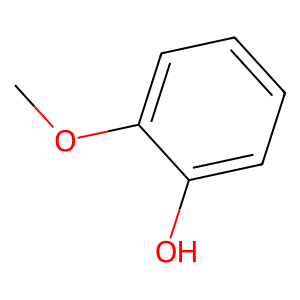

In [55]:
from rdkit import Chem
from rdkit.Chem import Draw

# Define the SMILES string
smiles_string = "COc1ccccc1O"

# Convert the SMILES string to a molecule
mol = Chem.MolFromSmiles(smiles_string)

# Draw the molecule and display the image
img = Draw.MolToImage(mol)
img.show()

In [11]:
'''
how to calculate smiles from xyz file in rdkit
'''
from rdkit.Chem import  MolToSmiles, rdDetermineBonds, Draw, MolFromXYZFile, Mol, RemoveHs
raw_mol = MolFromXYZFile('data/rop313/orop/124/1.gfn2.xyz')
mol = Mol(raw_mol)
rdDetermineBonds.DetermineBonds(mol, charge=0)
mol_no_h = RemoveHs(mol)
smi = MolToSmiles(mol_no_h, canonical=True, isomericSmiles=False)
print("SMILES:", smi)
img = Draw.MolToImage(mol_no_h)


output_image_file = "mol.png"
img.save(output_image_file)

SMILES: O=Cc1ccc2ccccc2c1


In [112]:
#cleaning up dataset
# saving only id and correct SMILES

import pandas as pd 

df = pd.read_csv('data/OROP_updated.csv', index_col=False)
df=df.drop(columns=['dG_red', 'Solvent', 'Charge_gn', 'Charge_rd', 'UHF_gn', 'UHF_rd', 'NumAtoms_1'])

df

,system_number,SMILES_1
0,49,COc1ccccc1O
1,181,O=C(O)c1ccccc1-c1c2cc(Br)c(=O)c(Br)c-2oc2c(Br)...
2,52,Oc1ccc(Br)cc1
3,27,CC=Cc1ccc(Cl)cc1
4,139,C(=Nc1ccccc1)c1ccccc1
...,...,...
181,18,CC=Cc1cccc(OC)c1
182,62,C1COCCO1
183,129,O=Cc1ccc(O)cc1
184,59,C1=COCCC1


In [113]:
#calculate all 2d desctiptors based on smiles

from rdkit import Chem
from mordred import Calculator, descriptors
import numpy as np 
np.float = float

smiles_list = df["SMILES_1"].tolist()

mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

calc=Calculator(descriptors, ignore_3D=True)

res = [calc(mol).asdict() for mol in mols]

df2=pd.DataFrame(res)

df2

/home/olga/miniconda3/envs/pum-24/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,6.432911,6.255590,0,0,11.203558,2.221583,4.443167,11.203558,1.24484,3.090233,...,8.689296,37.472182,124.052429,7.297202,86,10,40.0,44.0,3.472222,2.194444
1,22.976814,18.721178,1,0,37.051229,2.579777,5.159555,37.051229,1.277629,4.315072,...,10.630190,65.405606,643.710522,17.397582,1870,59,162.0,201.0,11.305556,6.194444
2,5.875634,5.525875,0,0,9.924777,2.170086,4.340173,9.924777,1.240597,2.97973,...,8.463159,35.730685,171.952377,13.227106,62,7,36.0,38.0,3.222222,1.833333
3,7.180458,6.674040,0,0,12.505533,2.202654,4.405308,12.505533,1.250553,3.188488,...,8.651899,38.682184,152.039278,8.002067,127,10,44.0,47.0,3.722222,2.416667
4,10.606602,8.731144,0,0,18.877841,2.210509,4.421017,18.877841,1.348417,3.551969,...,9.049115,44.690407,181.089149,7.243566,343,15,66.0,72.0,3.222222,3.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,7.778175,7.339588,0,0,13.80695,2.229072,4.458143,13.80695,1.255177,3.278705,...,8.773849,40.170439,148.088815,6.438644,164,12,48.0,52.0,3.972222,2.750000
182,4.242641,4.000000,0,0,8.0,2.0,4.0,8.0,1.333333,2.687624,...,7.627057,30.941317,88.052429,6.289459,27,3,24.0,24.0,1.5,1.500000
183,6.473351,6.127583,0,0,11.189957,2.193993,4.387987,11.189957,1.243329,3.089765,...,8.590258,37.289972,122.036779,8.135785,90,9,40.0,43.0,3.472222,2.166667
184,4.242641,4.000000,0,0,8.0,2.0,4.0,8.0,1.333333,2.687624,...,7.627057,30.941317,84.057515,6.004108,27,3,24.0,24.0,1.5,1.500000


In [114]:
from mordred.error import Error

df3 = df2.drop(columns=[col for col in df2.columns if df2[col].apply(lambda x: isinstance(x, Error)).any()])

df3

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,6.432911,6.255590,0,0,11.203558,2.221583,4.443167,11.203558,1.24484,3.090233,...,8.689296,37.472182,124.052429,7.297202,86,10,40.0,44.0,3.472222,2.194444
1,22.976814,18.721178,1,0,37.051229,2.579777,5.159555,37.051229,1.277629,4.315072,...,10.630190,65.405606,643.710522,17.397582,1870,59,162.0,201.0,11.305556,6.194444
2,5.875634,5.525875,0,0,9.924777,2.170086,4.340173,9.924777,1.240597,2.97973,...,8.463159,35.730685,171.952377,13.227106,62,7,36.0,38.0,3.222222,1.833333
3,7.180458,6.674040,0,0,12.505533,2.202654,4.405308,12.505533,1.250553,3.188488,...,8.651899,38.682184,152.039278,8.002067,127,10,44.0,47.0,3.722222,2.416667
4,10.606602,8.731144,0,0,18.877841,2.210509,4.421017,18.877841,1.348417,3.551969,...,9.049115,44.690407,181.089149,7.243566,343,15,66.0,72.0,3.222222,3.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,7.778175,7.339588,0,0,13.80695,2.229072,4.458143,13.80695,1.255177,3.278705,...,8.773849,40.170439,148.088815,6.438644,164,12,48.0,52.0,3.972222,2.750000
182,4.242641,4.000000,0,0,8.0,2.0,4.0,8.0,1.333333,2.687624,...,7.627057,30.941317,88.052429,6.289459,27,3,24.0,24.0,1.5,1.500000
183,6.473351,6.127583,0,0,11.189957,2.193993,4.387987,11.189957,1.243329,3.089765,...,8.590258,37.289972,122.036779,8.135785,90,9,40.0,43.0,3.472222,2.166667
184,4.242641,4.000000,0,0,8.0,2.0,4.0,8.0,1.333333,2.687624,...,7.627057,30.941317,84.057515,6.004108,27,3,24.0,24.0,1.5,1.500000


In [115]:

trash=df3.columns[(df3 == 0).all()]
corr_mat=df3.drop(columns=trash)
also_trash=[
    col for col in df3.columns
    if df3[col].dtypes =="object"
]

clean_df3=df3.drop(columns=also_trash)
clean_df3


,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,6.432911,6.255590,0,0,6,6,17,9,0,0,...,0.0,8.689296,37.472182,124.052429,7.297202,86,10,40.0,44.0,2.194444
1,22.976814,18.721178,1,0,20,21,37,29,0,0,...,0.0,10.630190,65.405606,643.710522,17.397582,1870,59,162.0,201.0,6.194444
2,5.875634,5.525875,0,0,6,6,13,8,0,0,...,0.0,8.463159,35.730685,171.952377,13.227106,62,7,36.0,38.0,1.833333
3,7.180458,6.674040,0,0,6,6,19,10,0,0,...,0.0,8.651899,38.682184,152.039278,8.002067,127,10,44.0,47.0,2.416667
4,10.606602,8.731144,0,0,12,12,25,14,0,0,...,0.0,9.049115,44.690407,181.089149,7.243566,343,15,66.0,72.0,3.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,7.778175,7.339588,0,0,6,6,23,11,0,0,...,0.0,8.773849,40.170439,148.088815,6.438644,164,12,48.0,52.0,2.750000
182,4.242641,4.000000,0,0,0,0,14,6,0,0,...,0.0,7.627057,30.941317,88.052429,6.289459,27,3,24.0,24.0,1.500000
183,6.473351,6.127583,0,0,6,6,15,9,0,0,...,0.0,8.590258,37.289972,122.036779,8.135785,90,9,40.0,43.0,2.166667
184,4.242641,4.000000,0,0,0,0,14,6,0,0,...,0.0,7.627057,30.941317,84.057515,6.004108,27,3,24.0,24.0,1.500000


In [116]:
corr_mat=clean_df3.corr()
corr_mat

,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
ABC,1.000000,0.989325,0.636808,0.283639,0.718941,0.721018,0.808833,0.992838,NaN,-0.040363,...,-0.156756,0.773344,0.799984,0.842641,-0.040224,0.602454,0.969995,0.996682,0.988646,0.965121
ABCGG,0.989325,1.000000,0.671023,0.316867,0.649851,0.652514,0.835402,0.993533,NaN,-0.037467,...,-0.148297,0.785148,0.808443,0.846172,-0.055862,0.624595,0.963181,0.982764,0.971979,0.975083
nAcid,0.636808,0.671023,1.000000,0.472356,0.267909,0.276556,0.666059,0.675569,NaN,-0.016874,...,-0.100382,0.323409,0.479088,0.760696,0.086938,0.561887,0.656951,0.626552,0.621415,0.689568
nBase,0.283639,0.316867,0.472356,1.000000,-0.096869,-0.090653,0.559754,0.332726,NaN,-0.018669,...,0.021918,0.072043,0.238755,0.259394,-0.143278,0.520001,0.236330,0.254241,0.227663,0.368862
nAromAtom,0.718941,0.649851,0.267909,-0.096869,1.000000,0.998029,0.356525,0.668806,NaN,-0.100359,...,-0.142983,0.626216,0.554054,0.529137,0.001064,0.297801,0.687495,0.730313,0.737444,0.618751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WPath,0.602454,0.624595,0.561887,0.520001,0.297801,0.304943,0.713287,0.630795,NaN,-0.011314,...,-0.067303,0.253383,0.447894,0.459228,-0.063787,1.000000,0.500320,0.574444,0.541591,0.645106
WPol,0.969995,0.963181,0.656951,0.236330,0.687495,0.693166,0.736710,0.960771,NaN,-0.075341,...,-0.202550,0.747011,0.740667,0.880281,0.029339,0.500320,1.000000,0.978786,0.983488,0.927963
Zagreb1,0.996682,0.982764,0.626552,0.254241,0.730313,0.734646,0.773386,0.982314,NaN,-0.029789,...,-0.129767,0.777339,0.809411,0.847473,-0.019134,0.574444,0.978786,1.000000,0.997308,0.945069
Zagreb2,0.988646,0.971979,0.621415,0.227663,0.737444,0.743705,0.741319,0.968930,NaN,-0.022041,...,-0.103772,0.775731,0.814833,0.850120,-0.004702,0.541591,0.983488,0.997308,1.000000,0.926409


In [117]:
#check if the descriptors correlate strongly with each other and remove such instances

high_corr = np.where(np.abs(corr_mat) >= 0.80)
high_corr_pairs = [
    (corr_mat.index[x], corr_mat.columns[y])
    for x, y in zip(*high_corr) if x != y
]



to_rm=set()
for des1, des2 in high_corr_pairs:
    if des1 not in to_rm and des2 not in to_rm:
        avg_corr_1 = corr_mat[des1].mean()
        avg_corr_2 = corr_mat[des2].mean()
        if avg_corr_1 > avg_corr_2:
            to_rm.add(des1)
        else:
            to_rm.add(des2)   
reduced_df = clean_df3.drop(columns=to_rm)

reduced_df


,nAcid,nBase,nSpiro,nBridgehead,nHetero,nN,nO,nS,nP,nX,...,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,PetitjeanIndex,SRW03,TSRW10,WPath
0,0,0,0,0,2,0,2,0,0,0,...,0.062500,0.000000,0.000000,0.000000,0.000000,0.0,0.400000,0.0,37.472182,86
1,1,0,0,0,9,0,5,0,0,4,...,0.030412,0.025673,0.021650,0.014598,0.003906,0.0,0.444444,0.0,65.405606,1870
2,0,0,0,0,2,0,1,0,0,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.400000,0.0,35.730685,62
3,0,0,0,0,1,0,0,0,0,1,...,0.036458,0.040408,0.000000,0.000000,0.000000,0.0,0.428571,0.0,38.682184,127
4,0,0,0,0,1,1,0,0,0,0,...,0.018056,0.000163,0.006076,0.008062,0.000000,0.0,0.444444,0.0,44.690407,343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0,0,0,0,1,0,1,0,0,0,...,0.034722,0.026939,0.000000,0.000000,0.000000,0.0,0.428571,0.0,40.170439,164
182,0,0,0,0,2,0,2,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,30.941317,27
183,0,0,0,0,2,0,2,0,0,0,...,0.059028,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.0,37.289972,90
184,0,0,0,0,1,0,1,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,30.941317,27


In [118]:
reduced_df.to_csv("2d_descriptors.csv", index=False)

In [45]:
from rdkit import Chem
from rdkit.Chem import Draw

smiles='O=C(O)c1ccccc1-c1c2cc(Br)c(=O)c(Br)c-2oc2c(Br)c(O)c(Br)cc12'
mol=Chem.MolFromSmiles(smiles)

img=Draw.MolToImage(mol)
img.show()